# Jupyter Notebook Testing Demographics in OG-UK
This notebook tests the `demographics.py` file in the `oguk` package against the similar file in the `ogusa` package.

In [2]:
# Import packages
import numpy as np
import scipy.optimize as opt
import pandas as pd
import eurostat
from oguk import demographics as dmg
import matplotlib.pyplot as plt

## 1. Test get_fert()

In [3]:
# Test Eurostat download info
Country = "UK"
Year = 2018
StartPeriod = Year
EndPeriod = Year
filter_pars = {"GEO": [Country]}
df_pop = eurostat.get_sdmx_data_df(
    "demo_pjan",
    StartPeriod,
    EndPeriod,
    filter_pars,
    flags=True,
    verbose=True
)

Progress: 100.0%


In [4]:
df_pop.describe()

,UNIT,SEX,AGE,GEO,FREQ,2018,2018_OBS_STATUS
count,309,309,309,309,309,309,309
unique,1,3,103,1,1,307,1
top,NR,F,TOTAL,UK,A,0.0,
freq,309,103,3,309,309,3,309


In [5]:
df_pop.head()

,UNIT,SEX,AGE,GEO,FREQ,2018,2018_OBS_STATUS
0,NR,F,TOTAL,UK,A,3.356362E7,
1,NR,F,UNK,UK,A,0.0,
2,NR,F,Y1,UK,A,379103.0,
3,NR,F,Y10,UK,A,390684.0,
4,NR,F,Y11,UK,A,380296.0,


In [6]:
df_pop['AGE'].unique()

array(['TOTAL', 'UNK', 'Y1', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15',
       'Y16', 'Y17', 'Y18', 'Y19', 'Y2', 'Y20', 'Y21', 'Y22', 'Y23',
       'Y24', 'Y25', 'Y26', 'Y27', 'Y28', 'Y29', 'Y3', 'Y30', 'Y31',
       'Y32', 'Y33', 'Y34', 'Y35', 'Y36', 'Y37', 'Y38', 'Y39', 'Y4',
       'Y40', 'Y41', 'Y42', 'Y43', 'Y44', 'Y45', 'Y46', 'Y47', 'Y48',
       'Y49', 'Y5', 'Y50', 'Y51', 'Y52', 'Y53', 'Y54', 'Y55', 'Y56',
       'Y57', 'Y58', 'Y59', 'Y6', 'Y60', 'Y61', 'Y62', 'Y63', 'Y64',
       'Y65', 'Y66', 'Y67', 'Y68', 'Y69', 'Y7', 'Y70', 'Y71', 'Y72',
       'Y73', 'Y74', 'Y75', 'Y76', 'Y77', 'Y78', 'Y79', 'Y8', 'Y80',
       'Y81', 'Y82', 'Y83', 'Y84', 'Y85', 'Y86', 'Y87', 'Y88', 'Y89',
       'Y9', 'Y90', 'Y91', 'Y92', 'Y93', 'Y94', 'Y95', 'Y96', 'Y97',
       'Y98', 'Y99', 'Y_LT1', 'Y_OPEN'], dtype=object)

In [7]:
indexNames = df_pop[
    (df_pop["AGE"] == "TOTAL")
    | (df_pop["AGE"] == "UNK")
    | (df_pop["AGE"] == "Y_OPEN")].index
df_pop.drop(indexNames, inplace=True)
df_pop.AGE[df_pop.AGE == "Y_LT1"] = "Y0"
df_pop["AGE"] = df_pop["AGE"].str[1:]
df_pop = df_pop[(df_pop["SEX"] == "T")]
Obs_status_col = str(Year) + "_OBS_STATUS"
df_pop = df_pop.drop(
    columns=["UNIT", "SEX", "GEO", "FREQ", Obs_status_col]
)
df_pop = df_pop.astype(float)
df_pop = df_pop.sort_values(by=["AGE"])

In [8]:
df_pop.rename(columns={2018: "POP"}, inplace=True)

In [9]:
df_pop

,AGE,POP
307,0.0,768431.0
208,1.0,777830.0
219,2.0,792428.0
230,3.0,798299.0
241,4.0,811766.0
...,...,...
302,95.0,43875.0
303,96.0,33235.0
304,97.0,22628.0
305,98.0,12940.0


Text(0, 0.5, 'Population')

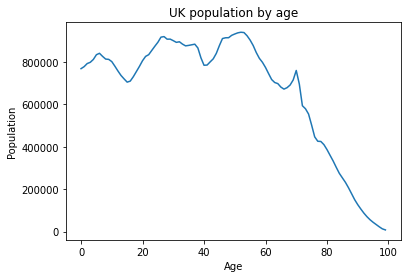

In [10]:
plt.plot(df_pop['AGE'], df_pop['POP'])
plt.title('UK population by age')
plt.xlabel('Age')
plt.ylabel('Population')

In [11]:
df_fert = eurostat.get_sdmx_data_df(
    "demo_fasec",
    StartPeriod,
    EndPeriod,
    filter_pars,
    flags=True,
    verbose=True,
)

Progress: 100.0%


In [12]:
df_fert.describe()

,UNIT,SEX,AGE,GEO,FREQ,2018,2018_OBS_STATUS
count,138,138,138,138,138,138,138
unique,1,3,46,1,1,138,1
top,NR,F,TOTAL,UK,A,355539.0,
freq,138,46,3,138,138,1,138


In [13]:
df_fert.head()

,UNIT,SEX,AGE,GEO,FREQ,2018,2018_OBS_STATUS
0,NR,F,TOTAL,UK,A,355539.0,
1,NR,F,UNK,UK,A,6.0,
2,NR,F,Y10-14,UK,A,31.0,
3,NR,F,Y15,UK,A,132.0,
4,NR,F,Y15-19,UK,A,10237.0,


In [14]:
df_fert['AGE'].unique()

array(['TOTAL', 'UNK', 'Y10-14', 'Y15', 'Y15-19', 'Y16', 'Y17', 'Y18',
       'Y19', 'Y20', 'Y20-24', 'Y21', 'Y22', 'Y23', 'Y24', 'Y25',
       'Y25-29', 'Y26', 'Y27', 'Y28', 'Y29', 'Y30', 'Y30-34', 'Y31',
       'Y32', 'Y33', 'Y34', 'Y35', 'Y35-39', 'Y36', 'Y37', 'Y38', 'Y39',
       'Y40', 'Y40-44', 'Y41', 'Y42', 'Y43', 'Y44', 'Y45', 'Y45-49',
       'Y46', 'Y47', 'Y48', 'Y49', 'Y_GE50'], dtype=object)

In [15]:
df_fert = df_fert[(df_fert["SEX"] == "T")]
df_fert = df_fert.drop(
    columns=["UNIT", "SEX", "GEO", "FREQ", Obs_status_col]
)

In [16]:
df_fert.rename(columns={Year: "BIRTHS"}, inplace=True)

In [17]:
indexNames = df_fert[
    (df_fert["AGE"] == "TOTAL")
    | (df_fert["AGE"] == "UNK")
    | (df_fert["AGE"] == "Y15-19")
    | (df_fert["AGE"] == "Y20-24")
    | (df_fert["AGE"] == "Y25-29")
    | (df_fert["AGE"] == "Y30-34")
    | (df_fert["AGE"] == "Y35-39")
    | (df_fert["AGE"] == "Y40-44")
    | (df_fert["AGE"] == "Y45-49")
].index
df_fert.drop(indexNames, inplace=True)

In [18]:
df_fert['BIRTHS'] = df_fert['BIRTHS'].astype(np.float64)

In [19]:
df_fert

,AGE,BIRTHS
94,Y10-14,73.0
95,Y15,310.0
97,Y16,1167.0
98,Y17,3168.0
99,Y18,6146.0
100,Y19,10380.0
101,Y20,13749.0
103,Y21,16963.0
104,Y22,20070.0
105,Y23,23191.0


In [20]:
print(df_fert['BIRTHS'].loc[df_fert["AGE"] == "Y10-14"].values.astype(float))

[73.]


In [ ]:
# Test get_fert
totpers = 100
base_yr = 2012
fert_rates = dmg.get_fert(totpers, base_yr, download=True)
print('fert_rates shape =', fert_rates.shape)
print(fert_rates)

In [ ]:
# Plot fertility rates by period
plt.plot(np.arange(totpers), fert_rates)
plt.title('Fertility rates in OG-UK (' + str(base_yr) + ')')
plt.xlabel('Age (years)')
plt.ylabel('fertility rate')

## 2. Test get_mort()